Early Detection of Diabetes in Women

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

STEP 1: Data Preprocessing

Saving diabetes_dataset.csv to diabetes_dataset (1).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Sample Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1      

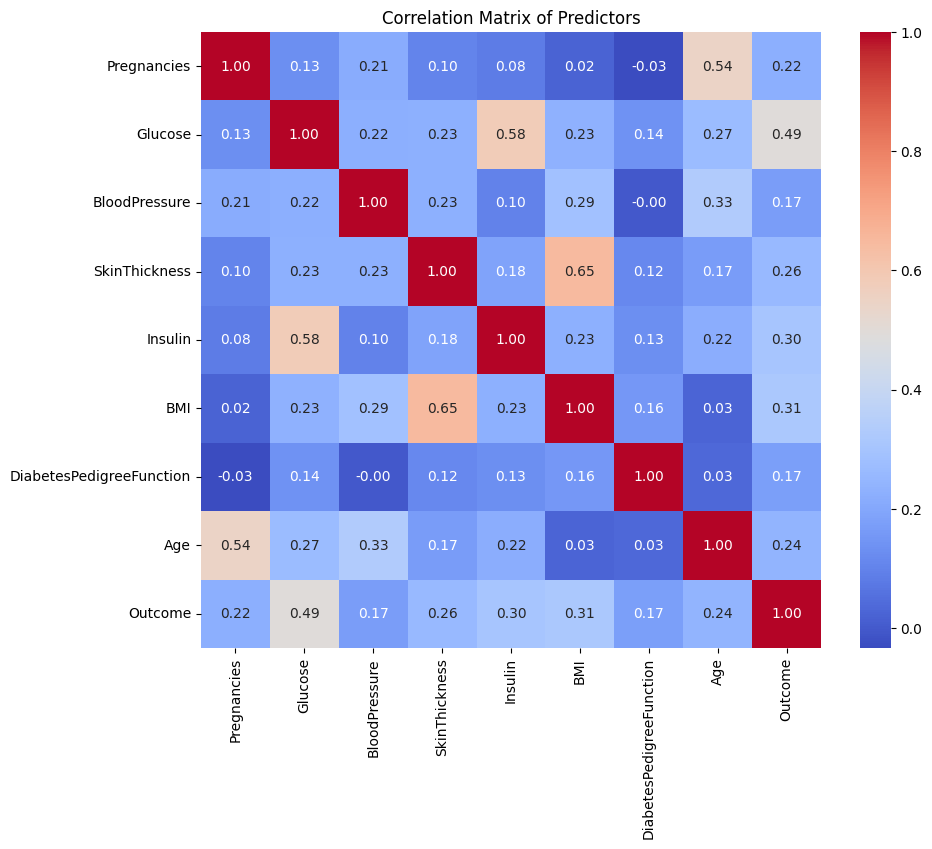

In [ ]:
# Step 1: File Upload
from google.colab import files
import pandas as pd
import numpy as np  # Import NumPy for handling missing values
import seaborn as sns
import matplotlib.pyplot as plt

# Upload the file
uploaded = files.upload()

# Load the dataset (assuming a single file is uploaded)
for filename in uploaded.keys():
    diabetes_data = pd.read_csv(filename)

# Step 1.1: Inspect the dataset structure
print("Dataset Info:")
print(diabetes_data.info())
print("\nSample Data:")
print(diabetes_data.head())

# Step 1.2: Check for missing or unusual values
# Count zeros in numeric columns where 0 may be invalid (e.g., Insulin, BMI)
zero_counts = (diabetes_data == 0).sum()
print("\nZero Value Counts:")
print(zero_counts)

# Step 1.3: Replace zeros with numpy.nan in specific columns for imputation later
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[columns_to_check] = diabetes_data[columns_to_check].replace(0, np.nan)

# Step 1.4: Generate a correlation matrix
correlation_matrix = diabetes_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Predictors")
plt.show()


STEP 2: Applying SMOTE for normalization

In [ ]:
# Step 2: Data Preprocessing

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Step 2.1: Handle missing values (impute)
# Impute missing values with the mean for continuous variables
imputer = SimpleImputer(strategy='mean')
diabetes_data_imputed = pd.DataFrame(imputer.fit_transform(diabetes_data), columns=diabetes_data.columns)

# Step 2.2: Split data into features (X) and target (y)
X = diabetes_data_imputed.drop(columns=['Outcome'])  # Features
y = diabetes_data_imputed['Outcome']  # Target

# Step 2.3: Normalize the features (scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2.4: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 2.5: Apply SMOTE to balance the data (especially for imbalanced classes)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE:
Outcome
0.0    400
1.0    400
Name: count, dtype: int64


Class Distribution before using SMOTE

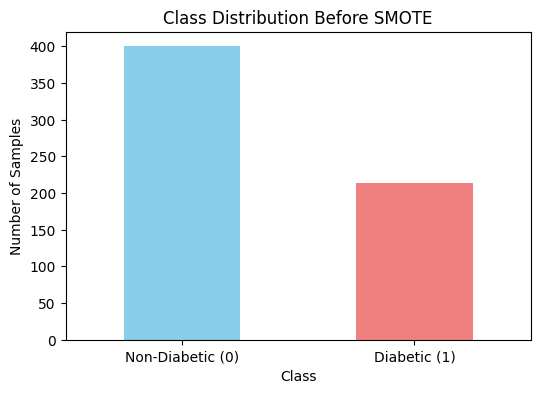

In [ ]:
import matplotlib.pyplot as plt

# Plotting class distribution before SMOTE
class_distribution_before_smote = y_train.value_counts()

plt.figure(figsize=(6,4))
class_distribution_before_smote.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks([0, 1], ['Non-Diabetic (0)', 'Diabetic (1)'], rotation=0)
plt.show()


Class Distribution after SMOTE

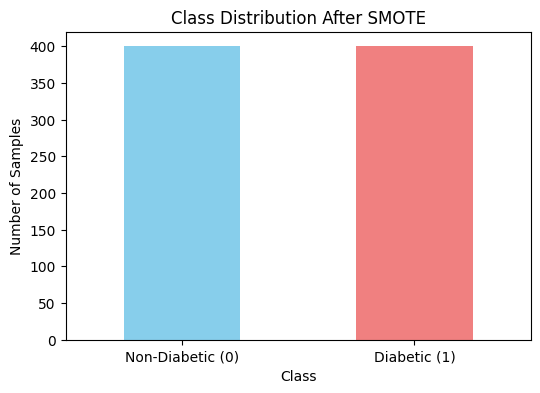

In [ ]:
# Plotting class distribution after SMOTE
class_distribution_after_smote = y_train_smote.value_counts()

plt.figure(figsize=(6,4))
class_distribution_after_smote.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks([0, 1], ['Non-Diabetic (0)', 'Diabetic (1)'], rotation=0)
plt.show()


K-NN Model

Best Hyperparameters for KNN:  {'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy:  0.7012987012987013
Classification Report for KNN: 
               precision    recall  f1-score   support

         0.0       0.81      0.70      0.75       100
         1.0       0.56      0.70      0.62        54

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



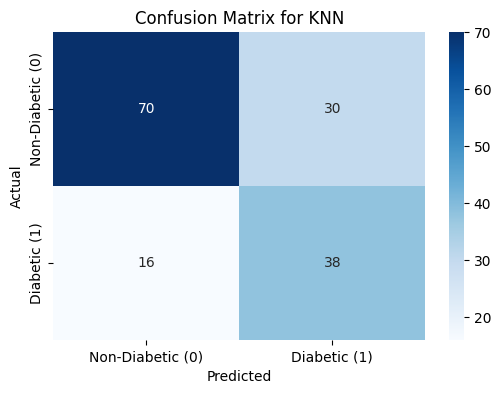

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# KNN Model with hyperparameter tuning
knn = KNeighborsClassifier()

# Hyperparameters for tuning
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# GridSearchCV to tune hyperparameters
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_smote, y_train_smote)

# Best hyperparameters for KNN
print("Best Hyperparameters for KNN: ", grid_knn.best_params_)

# Predictions on test data
y_pred_knn = grid_knn.predict(X_test)

# Evaluation metrics for KNN
print("KNN Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Classification Report for KNN: \n", classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic (0)', 'Diabetic (1)'], yticklabels=['Non-Diabetic (0)', 'Diabetic (1)'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Logistic Regression Model

Best Hyperparameters for Logistic Regression:  {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Logistic Regression Accuracy:  0.7207792207792207
Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

         0.0       0.82      0.73      0.77       100
         1.0       0.58      0.70      0.64        54

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154



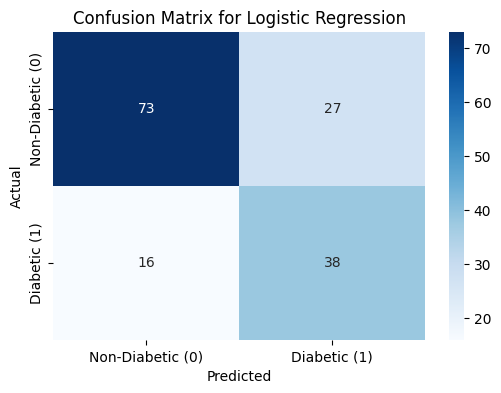

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model with hyperparameter tuning
log_reg = LogisticRegression()

# Hyperparameters for tuning
param_grid_log_reg = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200]}

# GridSearchCV to tune hyperparameters
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train_smote, y_train_smote)

# Best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression: ", grid_log_reg.best_params_)

# Predictions on test data
y_pred_log_reg = grid_log_reg.predict(X_test)

# Evaluation metrics for Logistic Regression
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report for Logistic Regression: \n", classification_report(y_test, y_pred_log_reg))

# Confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic (0)', 'Diabetic (1)'], yticklabels=['Non-Diabetic (0)', 'Diabetic (1)'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Comparison of Both ML Models

KNN Accuracy:  0.7012987012987013
Logistic Regression Accuracy:  0.7207792207792207


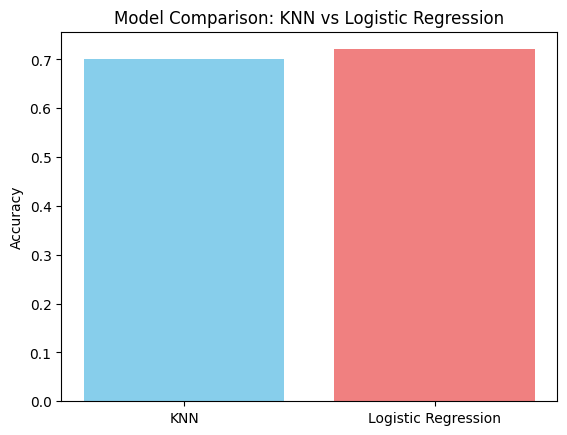

In [ ]:
# Comparing accuracy of KNN and Logistic Regression
print("KNN Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_log_reg))

# Create a bar chart to compare the accuracies
accuracies = [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_log_reg)]
models = ['KNN', 'Logistic Regression']

plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.title('Model Comparison: KNN vs Logistic Regression')
plt.ylabel('Accuracy')
plt.show()


Learning Curves and Visualizations

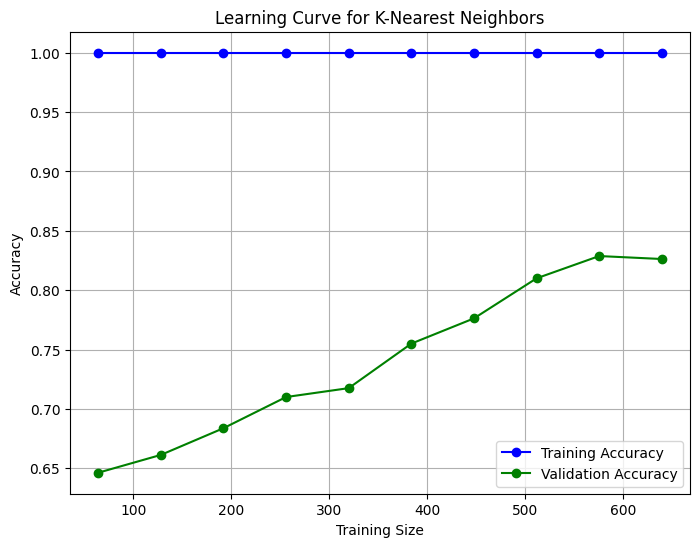

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

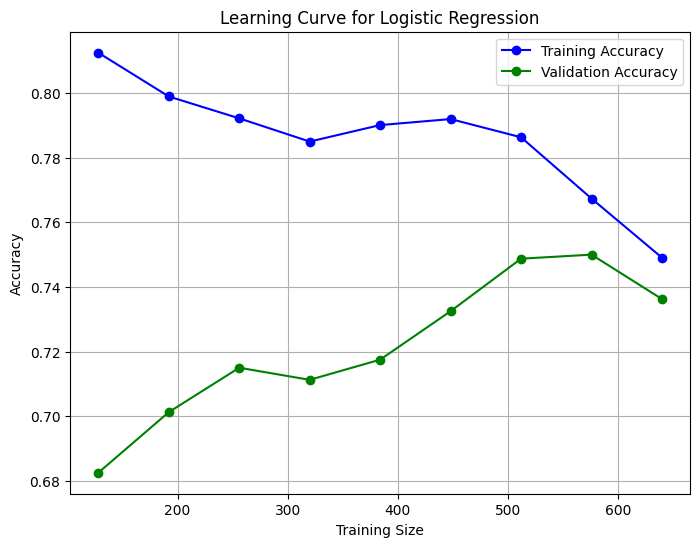

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Function to plot learning curves
def plot_learning_curve(model, X_train, y_train, model_name):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    valid_mean = np.mean(validation_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker='o')
    plt.plot(train_sizes, valid_mean, label="Validation Accuracy", color="green", marker='o')

    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot learning curves for KNN
plot_learning_curve(grid_knn.best_estimator_, X_train_smote, y_train_smote, "K-Nearest Neighbors")

# Plot learning curves for Logistic Regression
plot_learning_curve(grid_log_reg.best_estimator_, X_train_smote, y_train_smote, "Logistic Regression")


Comparison of K-NN and Logistic Regression Learning Curves

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

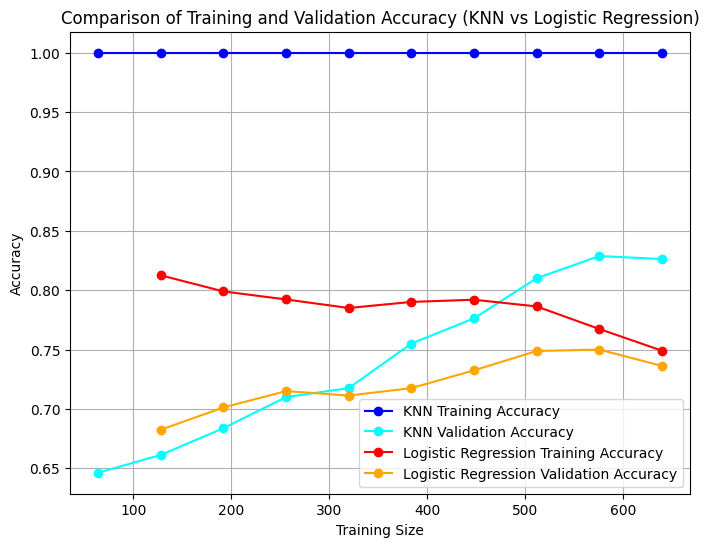

In [ ]:
# Plotting Training vs Validation Accuracy for KNN
train_sizes, train_scores, valid_scores = learning_curve(
    grid_knn.best_estimator_, X_train_smote, y_train_smote, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean_knn = np.mean(train_scores, axis=1)
valid_mean_knn = np.mean(valid_scores, axis=1)

# Plotting Training vs Validation Accuracy for Logistic Regression
train_sizes, train_scores, valid_scores = learning_curve(
    grid_log_reg.best_estimator_, X_train_smote, y_train_smote, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean_lr = np.mean(train_scores, axis=1)
valid_mean_lr = np.mean(valid_scores, axis=1)

# Plot both models' accuracy curves
plt.figure(figsize=(8, 6))

plt.plot(train_sizes, train_mean_knn, label="KNN Training Accuracy", color="blue", marker='o')
plt.plot(train_sizes, valid_mean_knn, label="KNN Validation Accuracy", color="cyan", marker='o')
plt.plot(train_sizes, train_mean_lr, label="Logistic Regression Training Accuracy", color="red", marker='o')
plt.plot(train_sizes, valid_mean_lr, label="Logistic Regression Validation Accuracy", color="orange", marker='o')

plt.title("Comparison of Training and Validation Accuracy (KNN vs Logistic Regression)")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()
